In [0]:
!pip3 install -q kaggle

In [0]:
 ! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time

100% 2.29G/2.29G [00:28<00:00, 36.5MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.2MB/s]


In [0]:
!mkdir dataset

In [7]:
!unzip best-artworks-of-all-time.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/resized/resized/Henri_Rousseau_62.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_63.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_64.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_65.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_66.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_67.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_68.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_69.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_7.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_70.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_8.jpg  
  inflating: dataset/resized/resized/Henri_Rousseau_9.jpg  
  inflating: dataset/resized/resized/Henri_de_Toulouse-Lautrec_1.jpg  
  inflating: dataset/resized/resized/Henri_de_Toulouse-Lautrec_10.jpg  
  inflating: dataset/resized/resized/Henri_de_Toulouse-Lautrec_11.jpg  
  inf

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [11]:
!ls -l dataset/resized/resized

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root  32752 Nov  5  2019 Henri_Matisse_7.jpg
-rw-r--r-- 1 root root  38501 Nov  5  2019 Henri_Matisse_80.jpg
-rw-r--r-- 1 root root  35752 Nov  5  2019 Henri_Matisse_81.jpg
-rw-r--r-- 1 root root  35850 Nov  5  2019 Henri_Matisse_82.jpg
-rw-r--r-- 1 root root  44945 Nov  5  2019 Henri_Matisse_83.jpg
-rw-r--r-- 1 root root  52153 Nov  5  2019 Henri_Matisse_84.jpg
-rw-r--r-- 1 root root  37123 Nov  5  2019 Henri_Matisse_85.jpg
-rw-r--r-- 1 root root  48865 Nov  5  2019 Henri_Matisse_86.jpg
-rw-r--r-- 1 root root  42310 Nov  5  2019 Henri_Matisse_87.jpg
-rw-r--r-- 1 root root  40584 Nov  5  2019 Henri_Matisse_88.jpg
-rw-r--r-- 1 root root  36297 Nov  5  2019 Henri_Matisse_89.jpg
-rw-r--r-- 1 root root  37474 Nov  5  2019 Henri_Matisse_8.jpg
-rw-r--r-- 1 root root  50303 Nov  5  2019 Henri_Matisse_90.jpg
-rw-r--r-- 1 root root  51739 Nov  5  2019 Henri_Matisse_91.jpg
-rw-r--r-- 1 root root  49391 Nov  5  2019 Henri_Matiss

In [12]:
path_img = 'dataset/resized/resized'
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('dataset/resized/resized/Rene_Magritte_76.jpg'),
 PosixPath('dataset/resized/resized/Vincent_van_Gogh_857.jpg'),
 PosixPath('dataset/resized/resized/Pierre-Auguste_Renoir_171.jpg'),
 PosixPath('dataset/resized/resized/Titian_145.jpg'),
 PosixPath('dataset/resized/resized/Vincent_van_Gogh_386.jpg')]

In [0]:
np.random.seed(2)
painting = r'/([^/]+)_\d+.jpg$'

In [0]:
bs = 16

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, painting, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

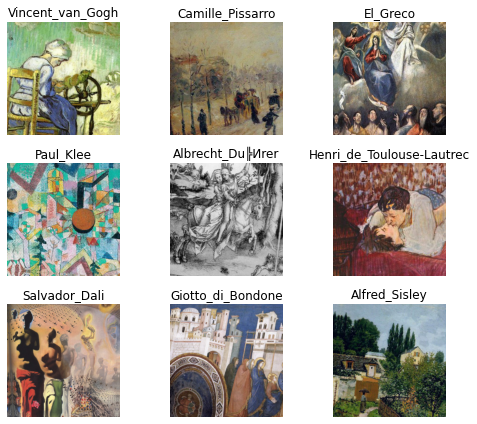

In [16]:
data.show_batch(rows=3, figsize=(7,6))

In [17]:
print(data.classes)
len(data.classes),data.c

['Albrecht_DuтХа├кrer', 'Albrecht_Du╠Иrer', 'Alfred_Sisley', 'Amedeo_Modigliani', 'Andrei_Rublev', 'Andy_Warhol', 'Camille_Pissarro', 'Caravaggio', 'Claude_Monet', 'Diego_Rivera', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Eugene_Delacroix', 'Francisco_Goya', 'Frida_Kahlo', 'Georges_Seurat', 'Giotto_di_Bondone', 'Gustav_Klimt', 'Gustave_Courbet', 'Henri_Matisse', 'Henri_Rousseau', 'Henri_de_Toulouse-Lautrec', 'Hieronymus_Bosch', 'Jackson_Pollock', 'Jan_van_Eyck', 'Joan_Miro', 'Kazimir_Malevich', 'Leonardo_da_Vinci', 'Marc_Chagall', 'Michelangelo', 'Mikhail_Vrubel', 'Pablo_Picasso', 'Paul_Cezanne', 'Paul_Gauguin', 'Paul_Klee', 'Peter_Paul_Rubens', 'Pierre-Auguste_Renoir', 'Piet_Mondrian', 'Pieter_Bruegel', 'Raphael', 'Rembrandt', 'Rene_Magritte', 'Salvador_Dali', 'Sandro_Botticelli', 'Titian', 'Vasiliy_Kandinskiy', 'Vincent_van_Gogh', 'William_Turner']


(51, 51)

#### Training: resnet34

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.718359,1.954093,0.517857,02:40
1,2.090588,1.676253,0.450461,02:40
2,1.628575,1.300060,0.386521,02:42
3,1.423937,1.224515,0.364055,02:42


In [0]:
learn.save('stage-1')

#### Results

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

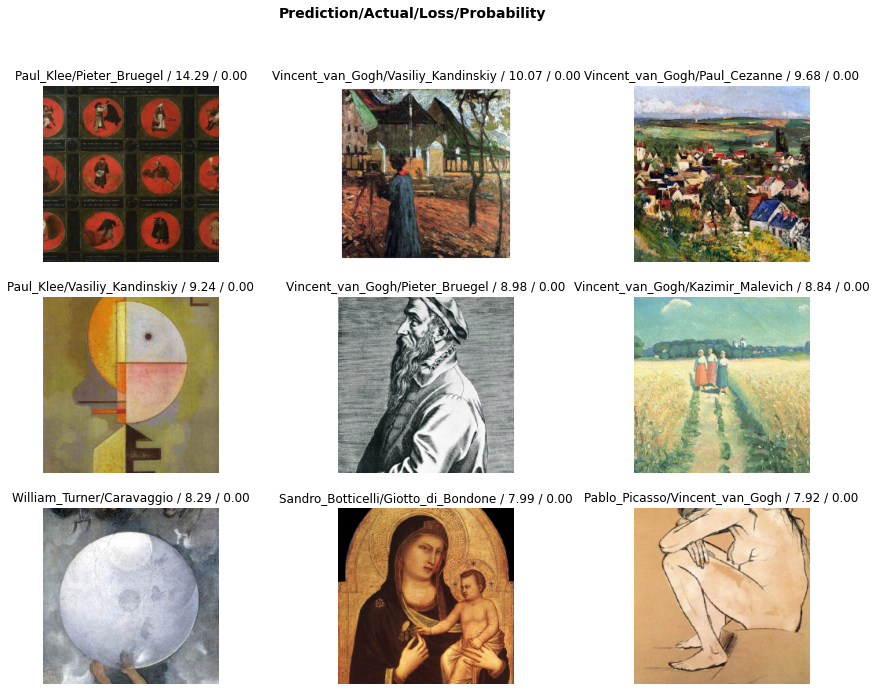

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

In [24]:
doc(interp.plot_top_losses)

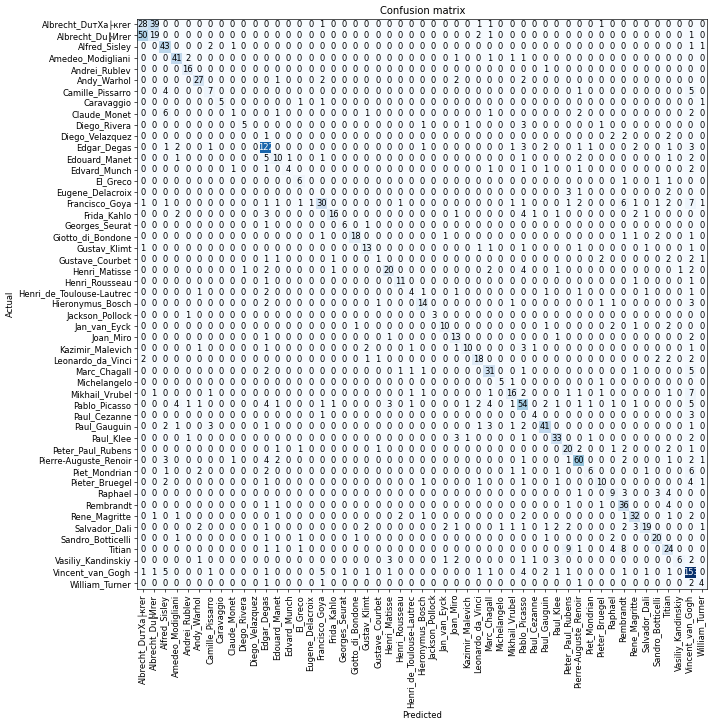

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
interp.most_confused(min_val=2)

[('Albrecht_Du╠Иrer', 'Albrecht_DuтХа├кrer', 50),
 ('Albrecht_DuтХа├кrer', 'Albrecht_Du╠Иrer', 39),
 ('Titian', 'Peter_Paul_Rubens', 9),
 ('Titian', 'Rembrandt', 8),
 ('Francisco_Goya', 'Vincent_van_Gogh', 7),
 ('Mikhail_Vrubel', 'Vincent_van_Gogh', 7),
 ('Claude_Monet', 'Alfred_Sisley', 6),
 ('Francisco_Goya', 'Rembrandt', 6),
 ('Piet_Mondrian', 'Vincent_van_Gogh', 6),
 ('Camille_Pissarro', 'Vincent_van_Gogh', 5),
 ('Edouard_Manet', 'Edgar_Degas', 5),
 ('Marc_Chagall', 'Vincent_van_Gogh', 5),
 ('Pablo_Picasso', 'Vincent_van_Gogh', 5),
 ('Vincent_van_Gogh', 'Alfred_Sisley', 5),
 ('Vincent_van_Gogh', 'Francisco_Goya', 5),
 ('Camille_Pissarro', 'Alfred_Sisley', 4),
 ('Frida_Kahlo', 'Pablo_Picasso', 4),
 ('Henri_Matisse', 'Pablo_Picasso', 4),
 ('Pablo_Picasso', 'Amedeo_Modigliani', 4),
 ('Pablo_Picasso', 'Edgar_Degas', 4),
 ('Pablo_Picasso', 'Marc_Chagall', 4),
 ('Pierre-Auguste_Renoir', 'Edgar_Degas', 4),
 ('Pieter_Bruegel', 'Vincent_van_Gogh', 4),
 ('Raphael', 'Titian', 4),
 ('Rembrandt

#### Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [28]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.851045,1.240885,0.369240,02:45


In [0]:
learn.load('stage-1');

In [30]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


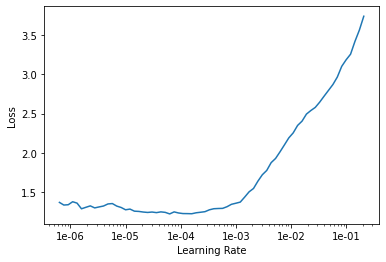

In [32]:
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.588924,1.135591,0.342742,02:47
1,1.046256,0.949884,0.292051,02:48


In [34]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

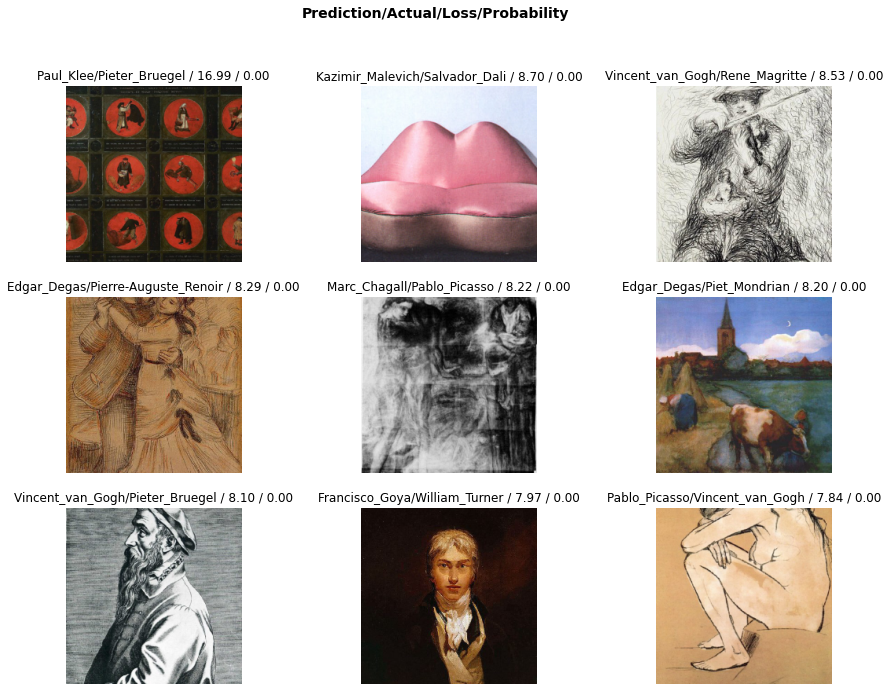

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

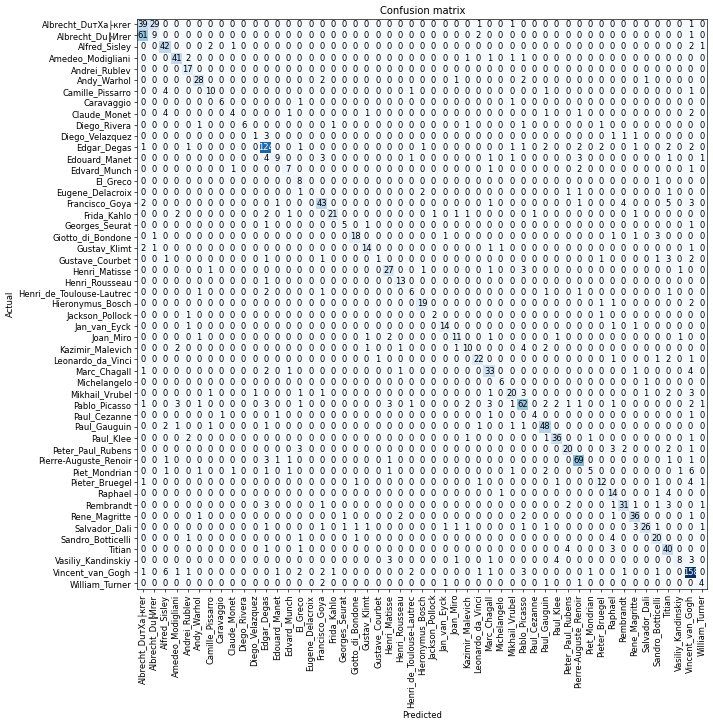

In [36]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [37]:
interp.most_confused(min_val=2)

[('Albrecht_Du╠Иrer', 'Albrecht_DuтХа├кrer', 61),
 ('Albrecht_DuтХа├кrer', 'Albrecht_Du╠Иrer', 29),
 ('Piet_Mondrian', 'Vincent_van_Gogh', 6),
 ('Vincent_van_Gogh', 'Alfred_Sisley', 6),
 ('Francisco_Goya', 'Titian', 5),
 ('Camille_Pissarro', 'Alfred_Sisley', 4),
 ('Claude_Monet', 'Alfred_Sisley', 4),
 ('Edouard_Manet', 'Edgar_Degas', 4),
 ('Francisco_Goya', 'Rembrandt', 4),
 ('Kazimir_Malevich', 'Pablo_Picasso', 4),
 ('Marc_Chagall', 'Vincent_van_Gogh', 4),
 ('Pieter_Bruegel', 'Vincent_van_Gogh', 4),
 ('Raphael', 'Titian', 4),
 ('Sandro_Botticelli', 'Raphael', 4),
 ('Titian', 'Peter_Paul_Rubens', 4),
 ('Vasiliy_Kandinskiy', 'Paul_Klee', 4),
 ('Diego_Velazquez', 'Edgar_Degas', 3),
 ('Edouard_Manet', 'Francisco_Goya', 3),
 ('Edouard_Manet', 'Pierre-Auguste_Renoir', 3),
 ('Francisco_Goya', 'Vincent_van_Gogh', 3),
 ('Giotto_di_Bondone', 'Sandro_Botticelli', 3),
 ('Gustave_Courbet', 'Titian', 3),
 ('Henri_Matisse', 'Pablo_Picasso', 3),
 ('Mikhail_Vrubel', 'Pablo_Picasso', 3),
 ('Mikhail_Vru